# [Tarea 10] Ejercicios Unidad 04-C | Descomposición LU
### CONJUNTO DE EJERCICIOS

- Mateo Molina Moises Estrella

**Link Repositorio:** https://github.com/R3LM15/MetodosNumericos_MateoMolina




1. Realice las siguientes multiplicaciones matriz-matriz:

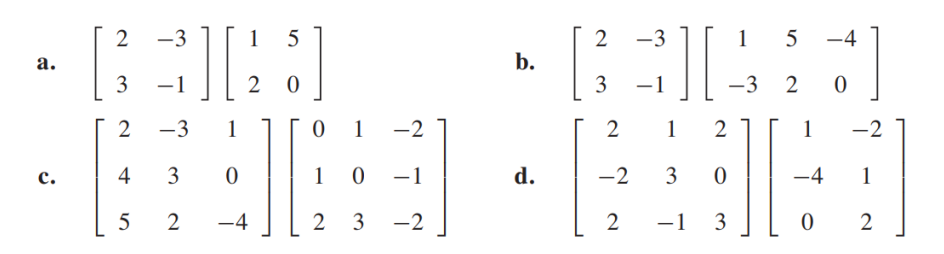

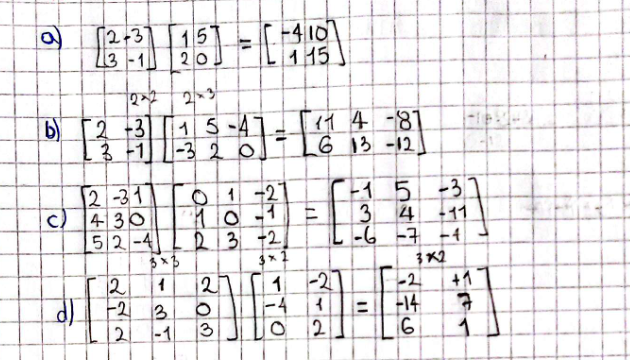

2. Determine cuáles de las siguientes matrices son no singulares y calcule la inversa de esas matrices:

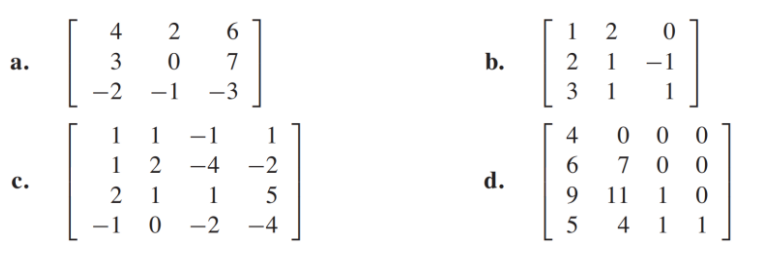

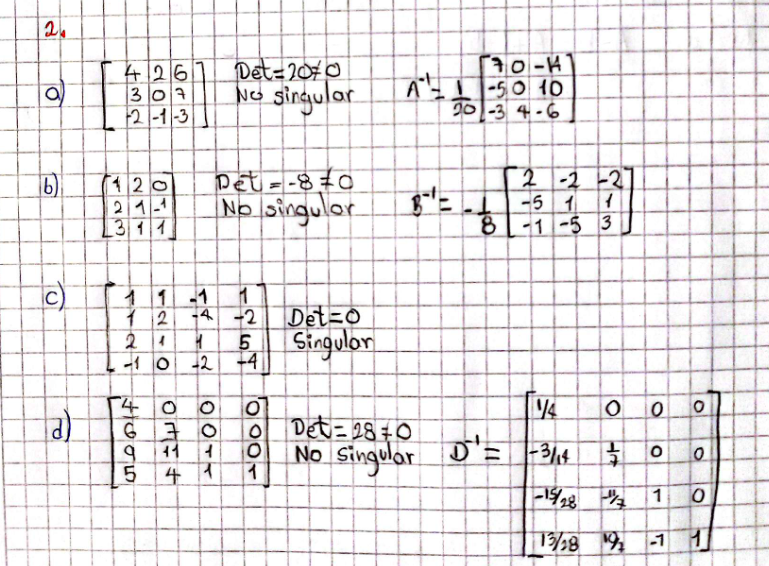

3. Resuelva los sistemas lineales 4 x 4 que tienen la misma matriz de coeficientes:

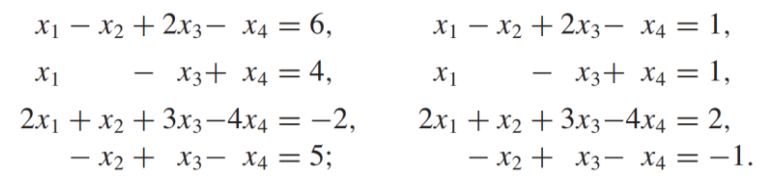

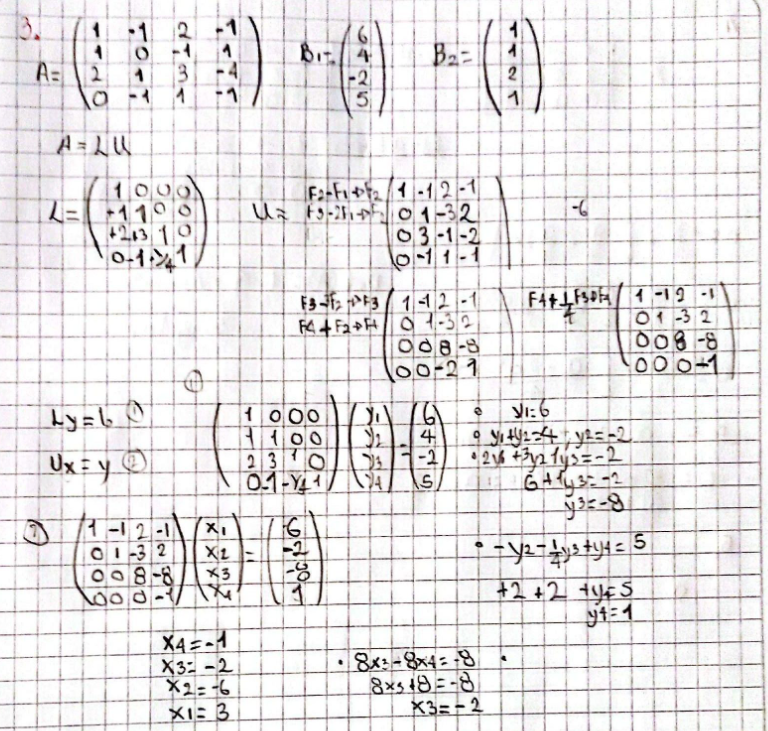

4. Encuentre los valores de A que hacen que la siguiente matriz sea singular.

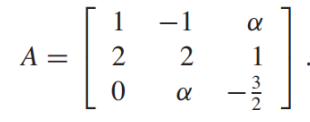

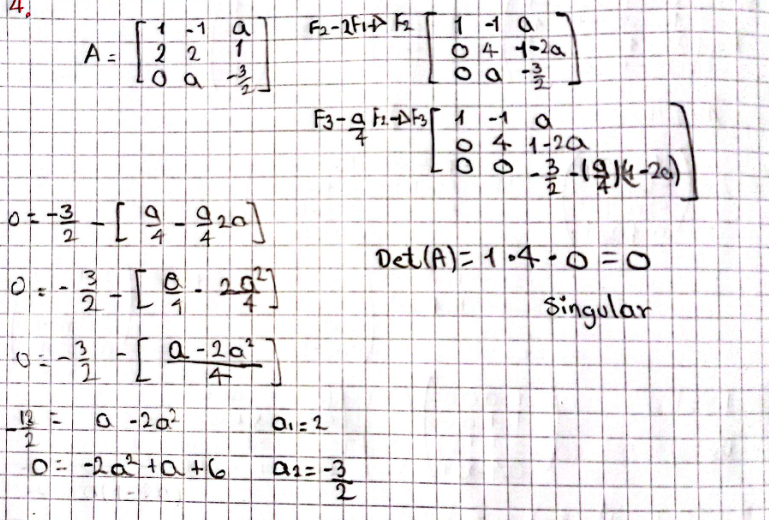

5. Resuelva los siguientes sistemas lineales:

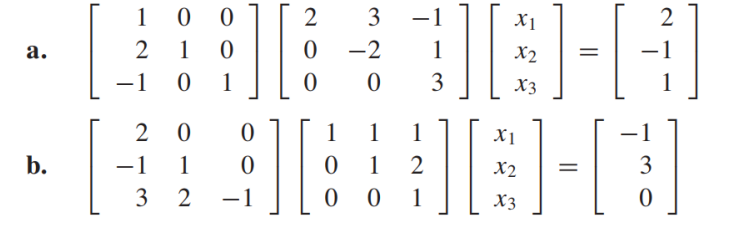

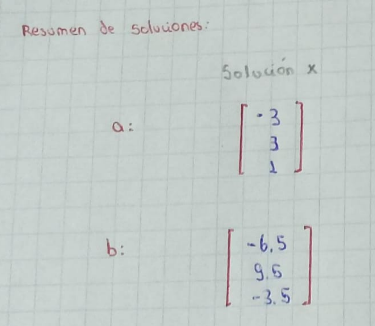


6. Factorice las siguientes matrices en la descomposición LU mediante el algoritmo de factorización LU
con lii = 1 para todas las i.

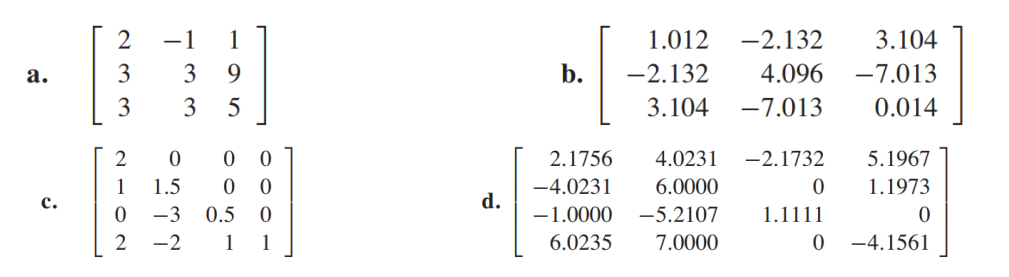

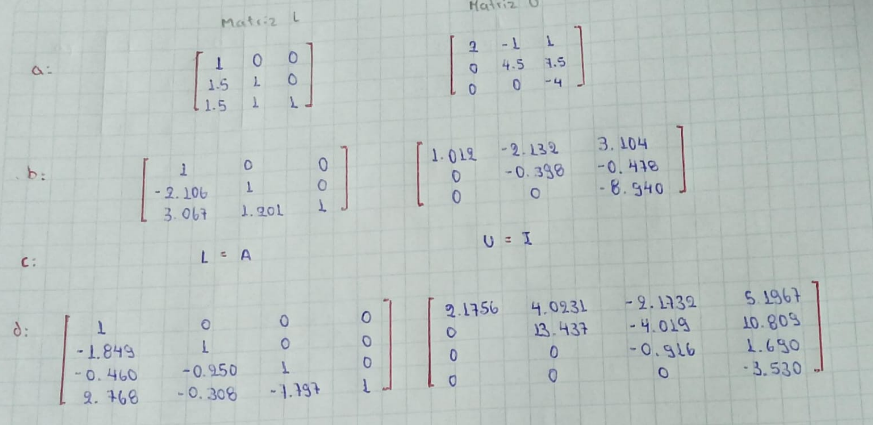



7. Modifique el algoritmo de eliminación gaussiana de tal forma que se pueda utilizar para resolver un sistema
lineal usando la descomposición LU y, a continuación, resuelva los siguientes sistemas lineales.

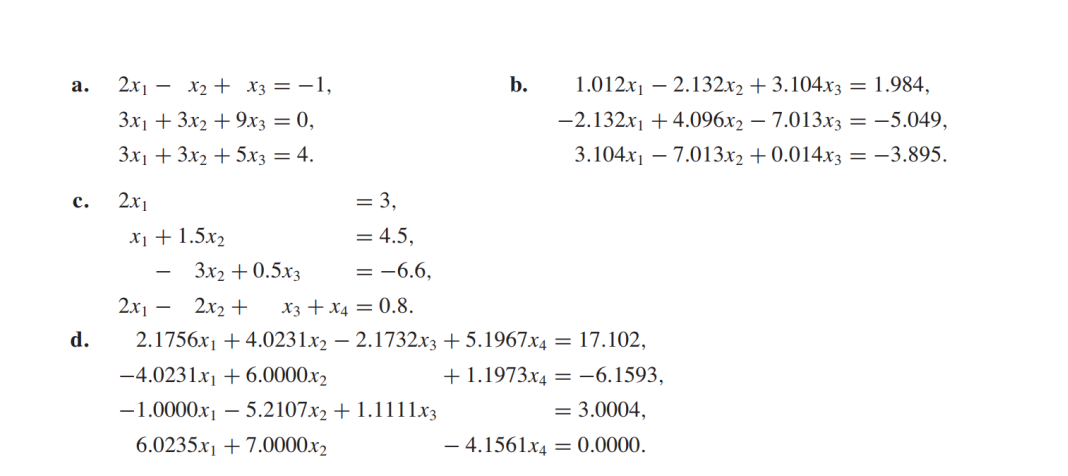

In [1]:
import numpy as np

def lu_decomposition(A):
    """Devuelve L y U tal que A = LU, sin pivoteo."""
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy().astype(float)

    for i in range(n):
        for j in range(i+1, n):
            factor = U[j, i] / U[i, i]
            L[j, i] = factor
            U[j, :] -= factor * U[i, :]
    
    return L, U

def forward_substitution(L, b):
    """Resuelve Ly = b para y."""
    n = L.shape[0]
    y = np.zeros_like(b, dtype=float)

    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])
    
    return y

def back_substitution(U, y):
    """Resuelve Ux = y para x."""
    n = U.shape[0]
    x = np.zeros_like(y, dtype=float)

    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    
    return x

def solve_by_lu(A, b):
    L, U = lu_decomposition(A)
    y = forward_substitution(L, b)
    x = back_substitution(U, y)
    return x, L, U


In [3]:
# Sistema a)
A_a = np.array([
    [2, -1, 1],
    [3, 3, 9],
    [3, 3, 5]
], dtype=float)

b_a = np.array([-1, 0, 4], dtype=float)

x_a, L_a, U_a = solve_by_lu(A_a, b_a)

print("\nSistema a):")
print("L =\n", L_a)
print("U =\n", U_a)
print("Solución x =\n", x_a)

# Sistema b)
A_b = np.array([
    [1.012, -2.132, 3.104],
    [-2.132, 4.096, -7.013],
    [3.104, -7.013, 0.014]
], dtype=float)

b_b = np.array([1.984, -5.049, -3.895], dtype=float)

x_b, L_b, U_b = solve_by_lu(A_b, b_b)

print("\nSistema b):")
print("L =\n", L_b)
print("U =\n", U_b)
print("Solución x =\n", x_b)

# Sistema c)
A_c = np.array([
    [2, 0, 0, 0],
    [1, 1.5, 0, 0],
    [0, -3, 0.5, 0],
    [2, -2, 1, 1]
], dtype=float)

b_c = np.array([3, 4.5, -6.6, 0.8], dtype=float)

x_c, L_c, U_c = solve_by_lu(A_c, b_c)

print("\nSistema c):")
print("L =\n", L_c)
print("U =\n", U_c)
print("Solución x =\n", x_c)

# Sistema d)
A_d = np.array([
    [2.1756, 4.0231, -2.1732, 5.1967],
    [-4.0231, 6.0000, 0, 1.1973],
    [-1.0000, -5.2107, 1.1111, 0],
    [6.0235, 7.0000, 0, -4.1561]
], dtype=float)

b_d = np.array([17.102, -6.1593, 3.0004, 0.0000], dtype=float)

x_d, L_d, U_d = solve_by_lu(A_d, b_d)

print("\nSistema d):")
print("L =\n", L_d)
print("U =\n", U_d)
print("Solución x =\n", x_d)


Sistema a):
L =
 [[1.  0.  0. ]
 [1.5 1.  0. ]
 [1.5 1.  1. ]]
U =
 [[ 2.  -1.   1. ]
 [ 0.   4.5  7.5]
 [ 0.   0.  -4. ]]
Solución x =
 [ 1.  2. -1.]

Sistema b):
L =
 [[ 1.          0.          0.        ]
 [-2.10671937  1.          0.        ]
 [ 3.06719368  1.19775553  1.        ]]
U =
 [[ 1.012      -2.132       3.104     ]
 [ 0.         -0.39552569 -0.47374308]
 [ 0.          0.         -8.93914077]]
Solución x =
 [1. 1. 1.]

Sistema c):
L =
 [[ 1.          0.          0.          0.        ]
 [ 0.5         1.          0.          0.        ]
 [ 0.         -2.          1.          0.        ]
 [ 1.         -1.33333333  2.          1.        ]]
U =
 [[2.  0.  0.  0. ]
 [0.  1.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  1. ]]
Solución x =
 [ 1.5  2.  -1.2  3. ]

Sistema d):
L =
 [[ 1.          0.          0.          0.        ]
 [-1.84919103  1.          0.          0.        ]
 [-0.45964332 -0.25012194  1.          0.        ]
 [ 2.76866152 -0.30794361 -5.35228302  1.        ]]
